<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

Text(0.5, 0, '')

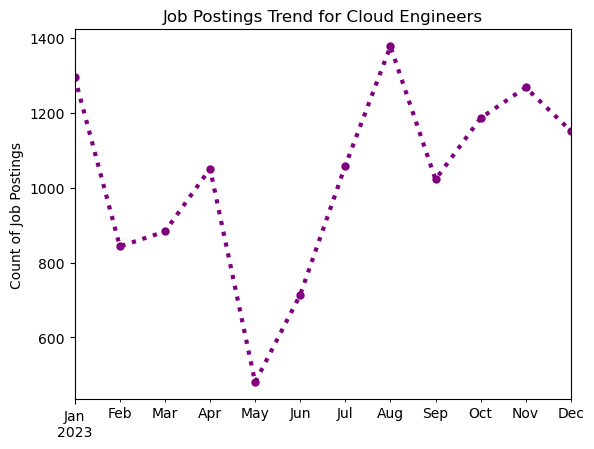

In [6]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df_ce = df[df["job_title_short"] == "Cloud Engineer"].copy()
df_ce["job_posted_month"] = df_ce["job_posted_date"].dt.to_period("M")
monthly_job_postings = df_ce.groupby("job_posted_month").size()
monthly_job_postings.plot(
    kind = "line",
    linewidth = 3,
    linestyle = ":",
    color="purple",
    markersize=5,
    marker="o"
)
plt.title("Job Postings Trend for Cloud Engineers")
plt.ylabel("Count of Job Postings")
plt.xlabel("")

1. df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
* job_posted_date sütunu muhtemelen string (metin) olarak geliyor, örneğin "2023-04-15".
* Bu satır, bu verileri tarih-zaman (datetime) formatına çevirir.
* Böylece .dt.month, .dt.to_period() gibi işlemler yapılabilir.

2. df_ce["job_posted_month"] = df_ce["job_posted_date"].dt.to_period("M")
* job_posted_date'den sadece yıl ve ay bilgisini alır.
* Örneğin: "2023-04-15" → "2023-04" (aylık period formatı).
* Bu, zaman serisi analizlerinde ay bazında gruplayabilmek için gereklidir.

3. monthly_job_postings = df_ce.groupby("job_posted_month").size()
* groupby() ile her ayda kaç tane "Cloud Engineer" ilanı olduğunu sayar.
* size() → her grubun eleman sayısını verir.
* Sonuç: ay → ilan sayısı şeklinde bir Series elde edilir.

####  Kısa Özet:

Bu kod, "Cloud Engineer" ilanlarının ay ay nasıl değiştiğini güzel bir çizgi grafikle gösterir. Doğru filtreleme, datetime dönüştürme, gruplama ve görselleştirme işlemleri yapılmıştır.

Text(0.5, 0, '')

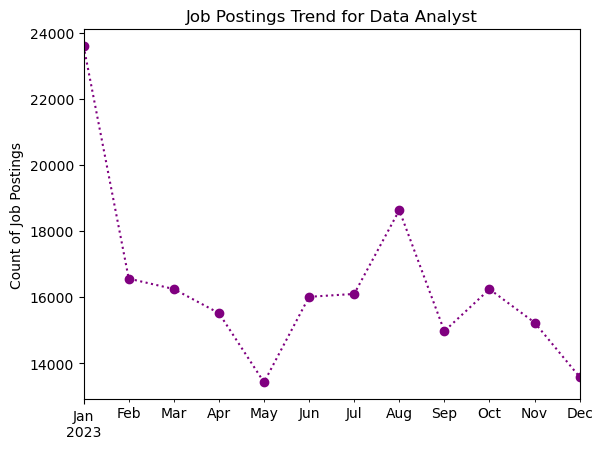

In [11]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df_da = df[df["job_title_short"] == "Data Analyst"].copy()
df_da["job_posted_month"] = df_da["job_posted_date"].dt.to_period("M")
monthly = df_da.groupby("job_posted_month").size()
monthly.plot(
    kind ="line",
    linestyle =":",
    color="purple",
    marker="o"
)
plt.title("Job Postings Trend for Data Analyst")
plt.ylabel("Count of Job Postings")
plt.xlabel("")

---

## 🟨 Customize Bar Chart (2.16.2)

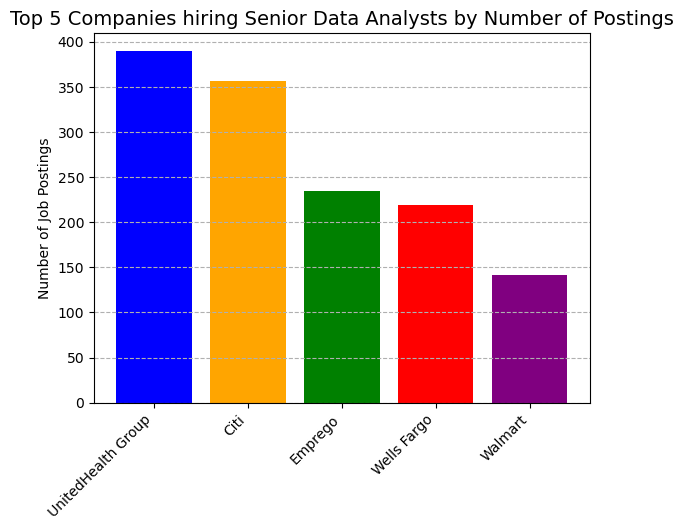

In [20]:
SDA_df = df[df["job_title_short"] == "Senior Data Analyst"].copy()
location_counts = SDA_df["company_name"].value_counts().head() #value_counts şirketin kaç ilan verdiğine bakar
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.bar(location_counts.index, location_counts.values, color=colors) # x ekseni şirket isimleri, y ekseni ialn sayıları 
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha="right") #şirket adları çapraz yazılır, sağa yaslı yazılır
plt.grid(axis='y', linestyle='--') # y eksenine grid çizgileri eklenir 
plt.show()


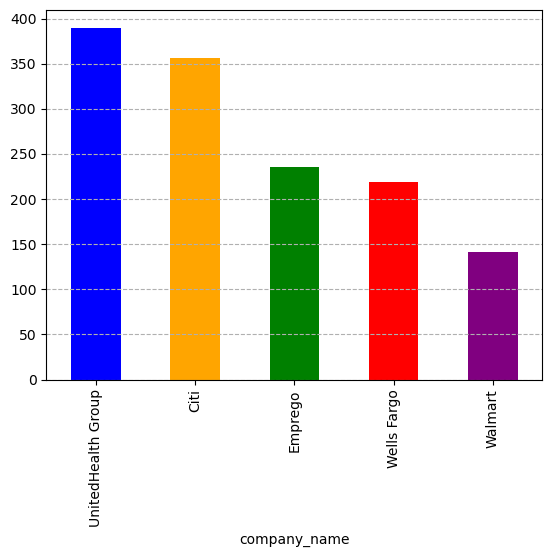

In [18]:
# Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']
SDA1_df = df[df["job_title_short"] == "Senior Data Analyst"].copy()
companies = SDA1_df["company_name"].value_counts().head()
companies.plot(
    kind="bar",
    color=colors
)
plt.grid(axis="y", linestyle="--")


---

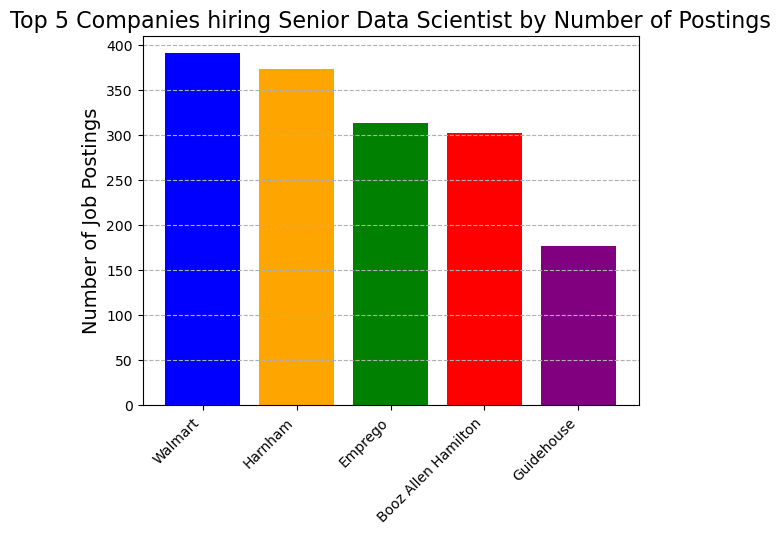

In [30]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
SDS_df = df[df["job_title_short"]== "Senior Data Scientist"]
locations = SDS_df["company_name"].value_counts().head()
plt.bar(locations.index, locations.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings', fontsize=14)
plt.title('Top 5 Companies hiring Senior Data Scientist by Number of Postings', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--")

